# What lifestyle habits most strongly affect academic performance (exam scores)?

**Can your daily habits really predict how well you'll do on an exam?**

## Introduction
This project investigates the relationship between various student lifestyle habits and their academic performance, specifically focusing on exam scores. The dataset, named *Student Habits vs Academic Performance* sourced from Kaggle and provided by Jayanta Nath, offers a diverse range of features related to students’ daily routines, including sleep patterns, study habits, diet quality, and more.

The aim is to analyze which lifestyle factors have the strongest correlations with exam performance and to build a simple yet interpretable regression model to predict scores based on these factors. The insights gained can inform educators, students, and parents about which habits may be most beneficial for academic success.

## Scope of the Project

This analysis involves several key steps:

- **Data cleaning and preprocessing** – including handling misinterpreted values, mapping ordinal categories, and encoding categorical variables.

- **Exploratory Data Analysis (EDA)** – to understand the distribution of features and detect potential patterns or anomalies.

- **Correlation analysis** – to identify which habits are statistically linked to academic performance.

- **Modeling** – using linear regression to quantify the impact of various lifestyle features on exam scores.

- **Evaluation** – assessing model performance using metrics such as R² and Root Mean Squared Error (RMSE), along with cross-validation to ensure generalizability.

## Tools & Libraries Used
The following tools and libraries were used to carry out the analysis:
- **Python** – programming language for data analysis and modeling.

- **pandas** – for data loading, manipulation, and cleaning.

- **NumPy** – for numerical operations.

- **seaborn & matplotlib** – for data visualization and exploratory analysis.

- **scikit-learn** – for machine learning tasks including train-test split, modeling, and evaluation.

- **scipy** – for statistical testing.

## Objective
The primary objective of this project is to explore how different lifestyle habits influence students’ academic outcomes and to build a predictive model that estimates exam scores based on these behaviors. By interpreting both correlation patterns and model coefficients, the project seeks to highlight which student habits are most conducive to academic success.


## Setup

In [ ]:
# Install the required libraries
%pip install pandas
%pip install scikit-learn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy

## Step 1: Import required libraries

I import Python libraries for data manipulation (`pandas`, `numpy`), visualization (`seaborn`, `matplotlib`), statistical testing (`scipy.stats`), and machine learning (`sklearn`). These tools allow for end-to-end exploratory analysis and model building.

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Step 2: Load and inspect the data

The dataset is loaded from a CSV file. A fix is applied to ensure the string "None" in one column isn’t mistakenly treated as missing data. This ensures accurate encoding later.

I also check the data structure, dimensions, and statistical summary to understand the variable types and ranges.

In [ ]:
df = pd.read_csv("student_habits_performance.csv", na_values=[], keep_default_na=False)

# Quick overview
print(df.shape)
print(df.info())
print(df.describe())

(1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 no

# Step 3: Clean and classify columns

Next, I separate the data into categories (like gender or diet quality) and numbers (like hours of sleep or exam scores), which helps in analyzing and visualizing the data appropriately.

In [3]:
# Check for missing values in the entire dataset
print(df.isnull().sum())

# Identify the categorical columns
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col.remove('student_id')
print(cat_col)
print(len(cat_col))

# Identify the numerical columns
all_columns = df.columns
exclude_columns = cat_col + ['student_id']
num_col = [col for col in all_columns if col not in exclude_columns]
print(num_col)
print(len(num_col))

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64
['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
6
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
9


## Steps 4: Visual exploration of the data

I create histograms of both the categorical and the numerical features. This helps detect strange values, but in the case of numerical features also helps to visualize normality and skewness.

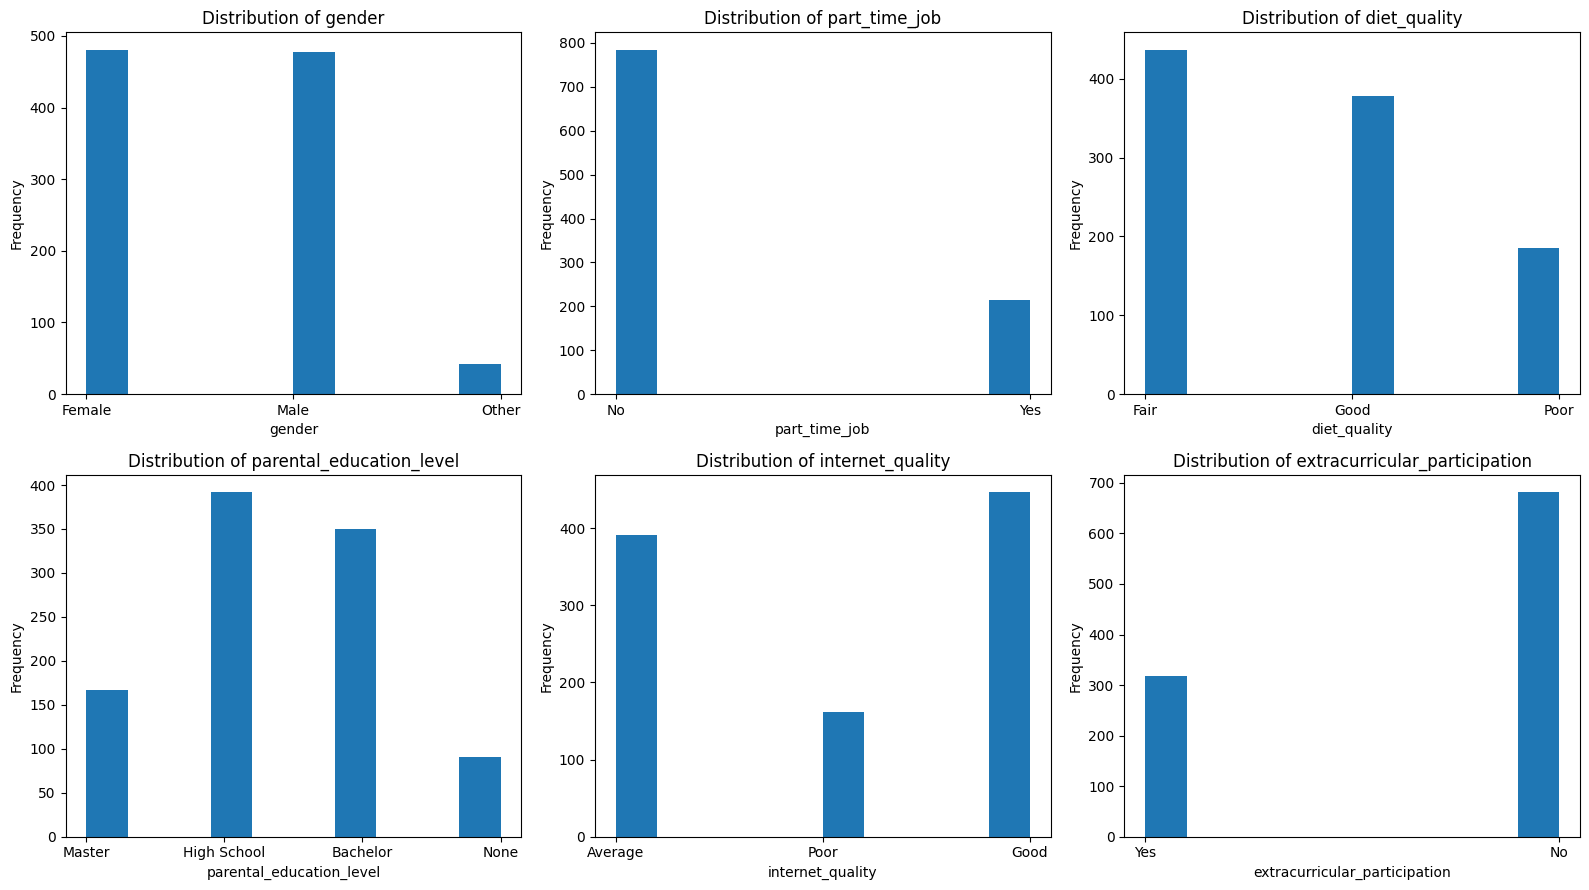

In [4]:
# Visualize distributions of the Categorical Columns
plt.figure(figsize=(16, 9))
for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

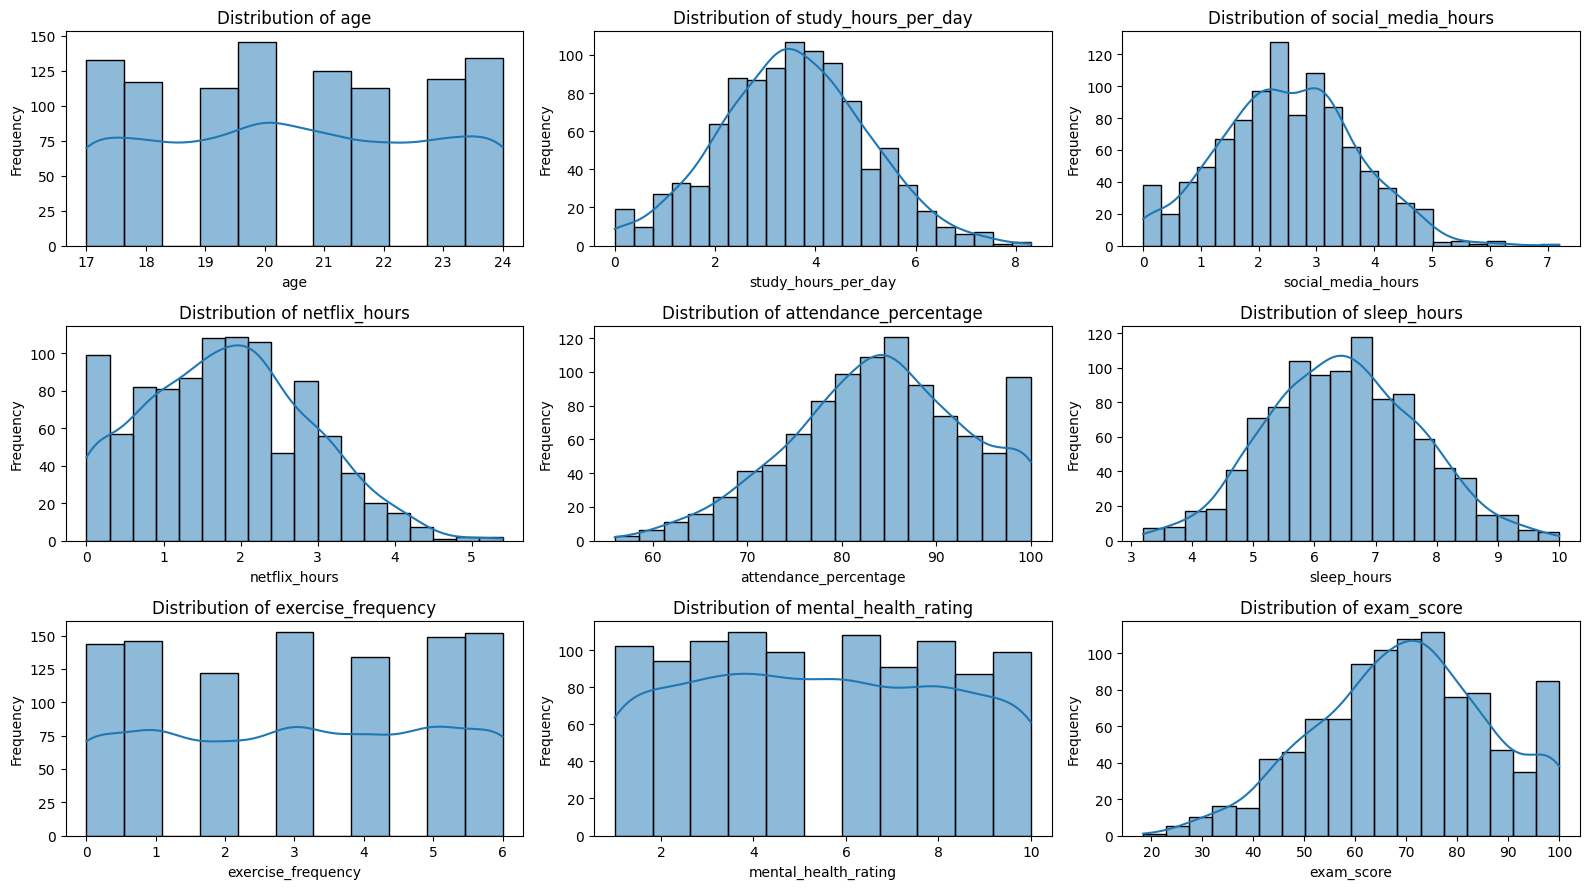

In [5]:
# Visualize distributions of the Numerical Columns
plt.figure(figsize=(16, 9))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)  # Adding kde for a smooth line over the histogram
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Step 5: Encode ordinal and nominal variables

Ordinal features are mapped manually to preserve their natural ordering. Words like "Good", "Fair", and "Poor" are turned into numbers so the model can work with them. This is important for anything that has a natural order or ranking. Nominal categorical variables are one-hot encoded for regression, with drop_first=True to avoid a multicollinearity as much as possible. Converts yes/no or category answers (like gender or part-time job) into a format the machine learning model can understand (columns of 0s and 1s).

In [6]:
# Mapping for ordinal variables
diet_quality_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2}  # 'fair' is considered the best in this example
internet_quality_mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
parental_education_mapping = {'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3}

# Applying the mappings
df['diet_quality'] = df['diet_quality'].map(diet_quality_mapping)
df['internet_quality'] = df['internet_quality'].map(internet_quality_mapping)
df['parental_education_level'] = df['parental_education_level'].map(parental_education_mapping)

# One-Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'part_time_job', 'extracurricular_participation'], drop_first=True)

# Quick check to see if everything was applied correctly
print(df.head())

  student_id  age  study_hours_per_day  social_media_hours  netflix_hours  \
0      S1000   23                  0.0                 1.2            1.1   
1      S1001   20                  6.9                 2.8            2.3   
2      S1002   21                  1.4                 3.1            1.3   
3      S1003   23                  1.0                 3.9            1.0   
4      S1004   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  diet_quality  exercise_frequency  \
0                   85.0          8.0             1                   6   
1                   97.3          4.6             2                   6   
2                   94.8          8.0             0                   1   
3                   71.0          9.2             0                   4   
4                   90.9          4.9             1                   3   

   parental_education_level  internet_quality  mental_health_rating  \
0              

## Step 6: Correlation analysis

### Among independent variables
I plot a correlation matrix to help identify potential multicollinearity and relationships between predictors.


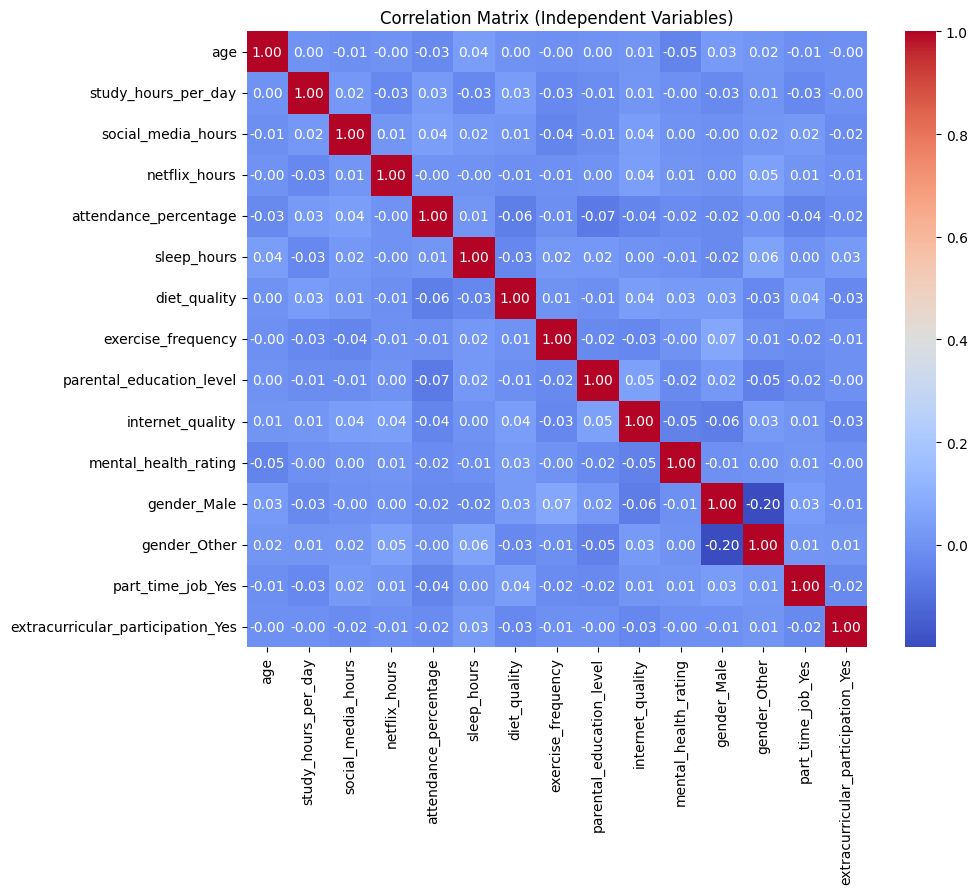

In [7]:
# Exclude the dependent variable (exam_score) from the correlation analysis
independent_vars = df.drop(columns=['exam_score', 'student_id'])

# Calculate the correlation matrix for the independent variables
correlation_matrix = independent_vars.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Independent Variables)")
plt.show()

Based on this correlation matrix we can be sure we won't encounter multicollinearity as none of the variables are unexpectedly highly related to eachother.

### With the target variable (exam_score)

Evaluates which lifestyle habits correlate most with exam scores and visualizes it in a bargraph with separate bars for positive and negative correlations to ohelp highlight helpful vs harmful habits.

age                                 -0.008907
study_hours_per_day                  0.825419
social_media_hours                  -0.166733
netflix_hours                       -0.171779
attendance_percentage                0.089836
sleep_hours                          0.121683
diet_quality                         0.015018
exercise_frequency                   0.160107
parental_education_level            -0.021129
internet_quality                    -0.036298
mental_health_rating                 0.321523
gender_Male                         -0.013191
gender_Other                         0.012976
part_time_job_Yes                   -0.026608
extracurricular_participation_Yes    0.000881
dtype: float64


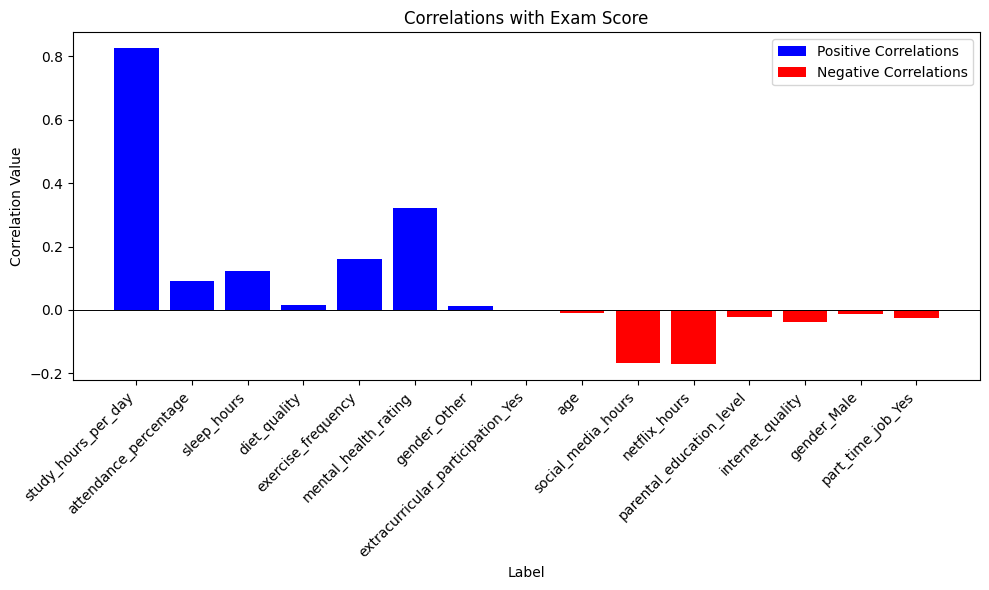

In [8]:
# Select exam_scores 
exam_scores = pd.Series(df['exam_score'])

# Calculate correlation
correlation_with_exam = independent_vars.corrwith(exam_scores)
print(correlation_with_exam)

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot positive correlations upwards
positive_correlations = correlation_with_exam[correlation_with_exam > 0]
plt.bar(positive_correlations.index, positive_correlations, color='blue', label='Positive Correlations')

# Plot negative correlations downwards (flip the sign for the visual effect)
negative_correlations = correlation_with_exam[correlation_with_exam < 0]
plt.bar(negative_correlations.index, negative_correlations, color='red', label='Negative Correlations')

# Add a horizontal axis line at y=0 for clarity
plt.axhline(0, color='black',linewidth=0.7)

# Add labels and title for better clarity
plt.xlabel('Label')
plt.ylabel('Correlation Value')
plt.title('Correlations with Exam Score')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Step 7: Test statistical significance

This tests whether the correlations found are statistically reliable or just due to random chance. 

In [9]:
for column in correlation_with_exam.index:
    # Get the correlation coefficient and test the significance
    correlation_coefficient = correlation_with_exam[column]
    column_data = independent_vars[column]  # Get the data for the respective column

    # Calculate the p-value using pearsonr for the current column
    _, p_value = stats.pearsonr(column_data, df['exam_score'])
    
    print(f"Correlation between {column} and exam_score:")
    print(f"  Pearson correlation coefficient: {correlation_coefficient}")
    print(f"  P-value: {p_value}")
    
    # Check if the correlation is statistically significant
    if p_value < 0.05:
        print(f"  The correlation is statistically significant.\n")
    else:
        print(f"  The correlation is not statistically significant.\n")

Correlation between age and exam_score:
  Pearson correlation coefficient: -0.00890687186398476
  P-value: 0.778470093706868
  The correlation is not statistically significant.

Correlation between study_hours_per_day and exam_score:
  Pearson correlation coefficient: 0.825418509396044
  P-value: 4.595701453347913e-250
  The correlation is statistically significant.

Correlation between social_media_hours and exam_score:
  Pearson correlation coefficient: -0.1667328851086167
  P-value: 1.1383673090665536e-07
  The correlation is statistically significant.

Correlation between netflix_hours and exam_score:
  Pearson correlation coefficient: -0.17177923845531573
  P-value: 4.602487490297232e-08
  The correlation is statistically significant.

Correlation between attendance_percentage and exam_score:
  Pearson correlation coefficient: 0.0898356017699274
  P-value: 0.004468430405695785
  The correlation is statistically significant.

Correlation between sleep_hours and exam_score:
  Pearso

## Step 8: Build a predictive model (linear regression)

### Define features and targets
This section selects the input features (variables that showed a significant correlation with exam_score) and the outcome to predict (exam score).

In [10]:
# Define dependent and independent variables
X = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']]
y = df['exam_score']
print(X.head())
print(y.head())

   study_hours_per_day  social_media_hours  netflix_hours  \
0                  0.0                 1.2            1.1   
1                  6.9                 2.8            2.3   
2                  1.4                 3.1            1.3   
3                  1.0                 3.9            1.0   
4                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  
0                     8  
1                     8  
2                     1  
3                     1  
4                     1  
0     56.2
1    100.0
2     34.3
3     26.8
4     66.4
Name: exam_score, dtype: float64


### Split into training and testing sets

The dataset is split so the model can learn from part of the data (training set) and be tested on unseen data (test set) to evaluate accuracy.

In [11]:
# Split your data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of your split data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (800, 7)
Test data shape: (200, 7)


### Fit and evaluate the model

A simple linear regression is used as a baseline model.
Model performance is assessed via:
- R² score: How well the model explains the variance in exam scores.
- RMSE: Root Mean Squared Error shows average prediction error magnitude.

In [12]:
#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8995801560882967
RMSE: 5.074501925779435


The linear regression model demonstrated strong predictive performance.

**The R² score** of approximately 0.90 indicates that the model explains about 90% of the variance in students’ exam scores based on the selected lifestyle variables. This suggests a very good fit: most of the variability in academic performance can be accounted for by the features included in the model, such as study hours, sleep quality, exercise frequency, and mental health rating.

**The RMSE value** of 5.07 means that, on average, the model’s predictions are about 5 points away from the actual exam scores. Given the typical score range (0–100), this level of error is relatively low, reinforcing the model’s usefulness for estimating exam outcomes based on lifestyle habits.

### Coefficients and interpretation

Each feature’s weight in the linear equation is shown—positive weights increase exam scores, negative decrease them.

In [13]:
# Get coefficients
coefficients = model.coef_
intercept = model.intercept_

# Display
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

study_hours_per_day: 9.5360
social_media_hours: -2.7032
netflix_hours: -2.3185
attendance_percentage: 0.1457
sleep_hours: 1.9922
exercise_frequency: 1.3153
mental_health_rating: 1.9493
Intercept: 7.0029


The regression coefficients reveal how each factor influences exam scores:
- **Study Hours (+9.54)**: Strongest positive predictor. Each additional hour of study per day increases exam score by 9.54 points.
- **Social Media Hours (–2.70)**: Each extra hour spent on social media decreases the score by 2.70 points.
- **Netflix Hours (–2.32)**: Each hour of Netflix use is linked to a 2.32-point drop in score.
- **Attendance (+0.15)**: A 1% increase in attendance raises the score by 0.15 points.
- **Sleep Hours (+1.99)**: Each extra hour of sleep predicts a 1.99-point gain.
- **Exercise Frequency (+1.32)**: Regular exercise adds about 1.32 points per unit increase.
- **Mental Health Rating (+1.95)**: Higher mental health scores are linked to a 1.95-point increase.
- **Intercept (+7.00)**: Baseline score when all predictors are zero.

Overall, studying, sleep, mental health, and exercise improve performance, while social media and Netflix lower it.

## Step 9: Residual analysis

Visualizing residuals checks whether assumptions of linear regression (like normality and homoscedasticity) are met.

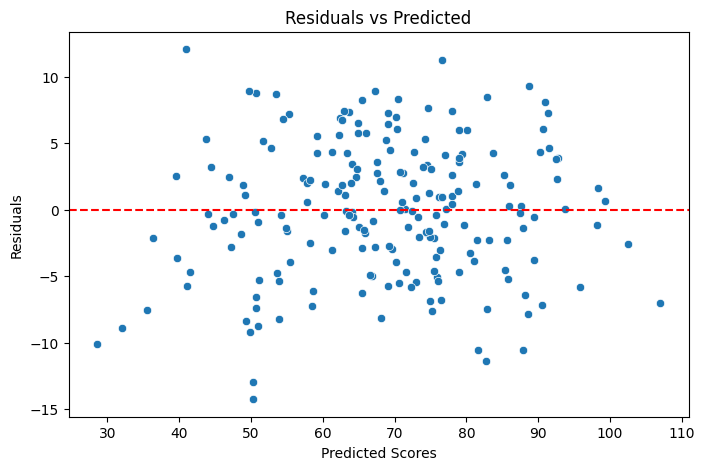

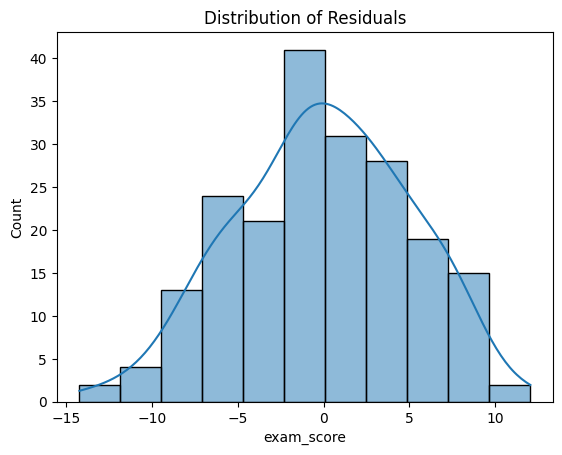

In [14]:
# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

The residual plots suggest that a linear model is appropriate, as there is no visible non-linear pattern that would indicate a better fit with a more complex relationship.

## Step 10: Cross-validation

The model is tested multiple times on different splits of the data to ensure the results are consistent and not just lucky on one split.

In [15]:
# Set up cross-validation (5 folds in this case)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation using negative MSE (since lower error is better)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {np.mean(scores):.4f}")

Cross-validated R² scores: [0.89958016 0.90675028 0.92514854 0.88130581 0.8699245 ]
Mean R²: 0.8965


The R² scores ranged from 0.87 to 0.93, with a mean R² of 0.8965. This indicates the model consistently explains nearly 90% of the variance in exam scores across different subsets of the data, suggesting it is both robust and reliable.

## Conclusion

This analysis of student habits and their impact on academic performance reveals several important insights. The linear regression model demonstrates a strong predictive capability, with an R² score of 0.90 on the test set, indicating the model can explain a significant portion of the variability in exam scores. The coefficients show that factors like study hours, attendance percentage, exercise frequency and mental health have a positive influence on performance, while social media and Netflix hours negatively affect exam scores.

Further analysis using cross-validation affirmed the model's stability, with a mean R² of 0.8965 across five folds, ensuring that the results are not overfitted to a particular subset of the data. Residual analysis revealed no major patterns, confirming that the model is appropriately capturing the relationships between the predictors and exam scores.

Overall, the findings emphasize the importance of study habits, sleep, exercise, and mental well-being in shaping academic performance, while highlighting the need to minimize distractions such as excessive social media and Netflix use. These results provide actionable insights for students, educators, and policy makers aiming to improve academic outcomes.